Hi guys! Welcome to Fuse's Notebook. Today we are going to analyze Retail dataset by using python.

# Introduction

Let me provide you the context and content of our dataset first:

**Context**
One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

**Content**
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

**Stores**
Anonymized information about the 45 stores, indicating the type and size of store

**Features**
Contains additional data related to the store, department, and regional activity for the given dates.

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week

**Sales**
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

**The Task**
1. Predict the department-wide sales for each store for the following year
2. Model the effects of markdowns on holiday weeks
3. Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

# Import Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame, Series 
df = pd.DataFrame()
import matplotlib.pyplot as plt # plotting
import seaborn as sns #plotting
import os # accessing directory structure

In [2]:
for root, dirs, filenames in os.walk('/kaggle'):
    for filename in filenames:
        #print(os.path.join(root, filename))
        print(root)
        print(dirs)
        print(filename)

/kaggle/src
[]
script.ipynb
/kaggle/lib/kaggle
[]
gcp.py
/kaggle/input/retaildataset
[]
stores data-set.csv
/kaggle/input/retaildataset
[]
Features data set.csv
/kaggle/input/retaildataset
[]
sales data-set.csv
/kaggle/working
[]
__notebook__.ipynb


In [3]:
for root, dirs, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(root, filename))

/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv


There are 3 CSV files in the Retail Data Analytics Dataset. Let's collect the data in easy-to-use variables.

In [4]:
# collect data in variables

stores = pd.read_csv("/kaggle/input/retaildataset/stores data-set.csv")
features = pd.read_csv("/kaggle/input/retaildataset/Features data set.csv")
sales = pd.read_csv("/kaggle/input/retaildataset/sales data-set.csv")

Then I'm gonna find out how many rows and column of these dataset.

Now we're going to take a peak inside the dataset, and explore 

# Store Data

In [5]:
# using .shape to explore rows and columns in datasets

print(stores.shape)

(45, 3)


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [8]:
# find number of unique values in each column

stores.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [9]:
# using df.describe

stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [10]:
# Finding average store size in each store type

stores_A = stores[stores["Type"]=="A"]
stores_B = stores[stores["Type"]=="B"]
stores_C = stores[stores["Type"]=="C"]
print("Store A Average Size =", np.mean(stores_A.Size))
print("Store B Average Size =", np.mean(stores_B.Size))
print("Store C Average Size =", np.mean(stores_C.Size))

Store A Average Size = 177247.72727272726
Store B Average Size = 101190.70588235294
Store C Average Size = 40541.666666666664


Text(0.5, 1.0, 'Ratio of missing values per columns')

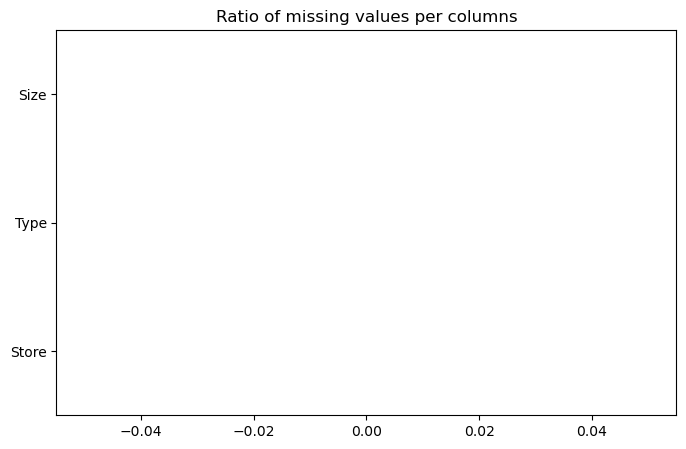

In [11]:
# Graph plotting for missing values

plt.figure(figsize=(8, 5))
stores.isnull().mean(axis=0).plot.barh()
plt.title('Ratio of missing values per columns')

In [12]:
import plotly.express as px

labels = stores['Type'].tolist()
values = stores['Store'].tolist()
storecount = stores['Store'].count()
print(storecount)

fig = px.pie(stores, values=values, names=labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(height=500, width=700, title='Store by Type')
fig.show()

45


In [13]:
fig = px.bar(stores, x='Type', y="Size", color="Type")
fig['layout'].update(height=400, width=550, title='Size of Type Store')
fig.show()

**Summary**
* Store type A has the highest contribution among  store types (A,B, and C)
* Also, we could see that store type A seems to have the largest size

# Features Data

In [14]:
# using .shape to explore rows and columns in datasets

features.shape

(8190, 12)

In [15]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
features.tail(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [17]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [18]:
# find out each column data type

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [19]:
# find number of unique values in each column

features.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

Text(0.5, 1.0, 'Ratio of missing values per columns')

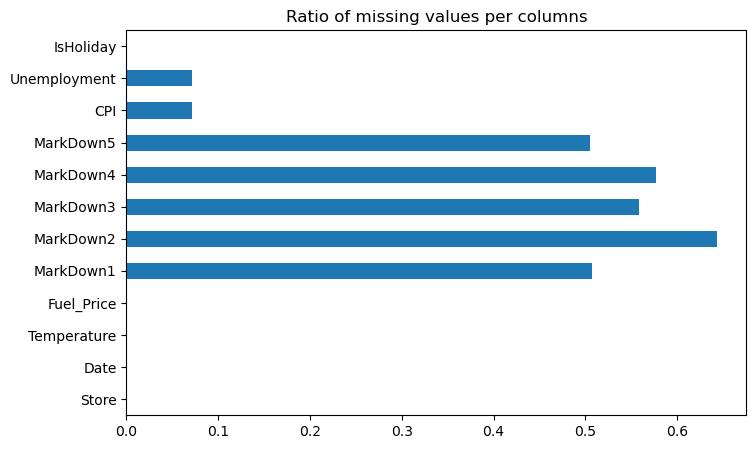

In [20]:
# Graph plotting for missing values

plt.figure(figsize=(8, 5))
features.isnull().mean(axis=0).plot.barh()
plt.title('Ratio of missing values per columns')

This bar chart shows that Features data has **many null values**, some of them are higher than 50% of data amount in the column

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go 

fig = make_subplots(rows=1, 
                    cols=1)

custom_aggregation = {}
custom_aggregation["CPI"] = "mean"
features = features.set_index(pd.DatetimeIndex(features['Date']))
data0 = features.resample('M').agg(custom_aggregation)
data0.columns = ["CPI"]
data0['Date'] = data0.index

x = data0['Date'].tolist()
y = data0['CPI'].tolist()
y_ = data0['CPI'].interpolate().tolist()

fig.add_trace(go.Scatter(x=x, y=y,name='CPI'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=y_,mode='markers',name='Interpolate CPI'), 1, 1)

fig['layout'].update(height=500, width=900, title='Monthly Consumer Price Index (Average)')
fig.show()

# Sales Data

In [22]:
sales.shape

(421570, 5)

In [23]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [24]:
sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [26]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [27]:
sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

Text(0.5, 1.0, 'Ratio of missing values per columns')

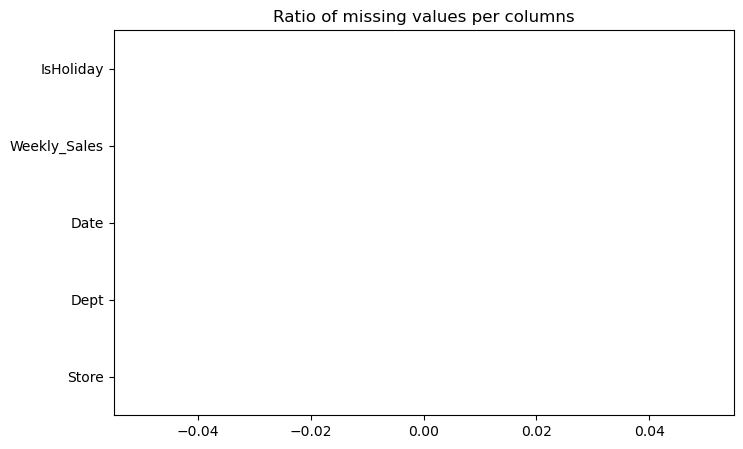

In [28]:
# Graph plotting for missing values

plt.figure(figsize=(8, 5))
sales.isnull().mean(axis=0).plot.barh()
plt.title('Ratio of missing values per columns')